In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize']=(18,8)

In [27]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
import xgboost as xgb

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [7]:
import os

current_working_directory = os.getcwd()
if(current_working_directory=='/content'):
    from google.colab import drive
    drive.mount('/content/drive')
    path='/content/drive/My Drive/SRM/Colab Notebooks/'
else:
    path='G:/My Drive/SRM/Colab Notebooks/'
print(path)

G:/My Drive/SRM/Colab Notebooks/


In [8]:
train = pd.read_csv(path+'Kaggle/playground-series-s3e20/train.csv', index_col=['ID_LAT_LON_YEAR_WEEK'])
train

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
ID_-0.510_29.290_2019_03,-0.510,29.290,2019,3,NaN,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
ID_-0.510_29.290_2019_04,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_-3.299_30.301_2021_48,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,55.988022,...,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171
ID_-3.299_30.301_2021_49,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,19.435339,...,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497
ID_-3.299_30.301_2021_50,-3.299,30.301,2021,50,NaN,NaN,NaN,NaN,NaN,NaN,...,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205


In [9]:
test = pd.read_csv(path+'Kaggle/playground-series-s3e20/test.csv', index_col=['ID_LAT_LON_YEAR_WEEK'])
test

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2022_00,-0.510,29.290,2022,0,NaN,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
ID_-0.510_29.290_2022_01,-0.510,29.290,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,15.600607,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
ID_-0.510_29.290_2022_02,-0.510,29.290,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,39.889060,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
ID_-0.510_29.290_2022_03,-0.510,29.290,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,58.862543,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
ID_-0.510_29.290_2022_04,-0.510,29.290,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,15.646016,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_-3.299_30.301_2022_44,-3.299,30.301,2022,44,-0.000618,0.745549,-0.000461,0.234492,72.306198,61.114494,...,48839.430415,6260.120033,55483.459980,5260.120056,30.398508,0.180046,-25.528588,45.284576,-116.521412,29.992562
ID_-3.299_30.301_2022_45,-3.299,30.301,2022,45,NaN,NaN,NaN,NaN,NaN,NaN,...,47042.694849,6678.843299,53589.917383,5678.951521,19.223844,0.177833,-13.380005,43.770351,-122.405759,29.017975
ID_-3.299_30.301_2022_46,-3.299,30.301,2022,46,NaN,NaN,NaN,NaN,NaN,NaN,...,55337.148173,5336.282475,62646.761340,4336.282491,13.801194,0.219471,-5.072065,33.226455,-124.530639,30.187472


In [10]:
col = list(train.columns)

In [11]:
new_cols = [
'latitude',
'longitude',
'year',
'week_no',
'SO2_col_no_density',
'SO2_col_no_density_amf',
'SO2_slant_col_no_density',
'SO2_cloud_fraction',
'SO2_sen_azi_ang',
'SO2_sen_zen_ang',
'SO2_sol_azi_ang',
'SO2_sol_zen_ang',
'SO2_col_no_density_15km',
'CO_col_no_density',
'CO_H2O_col_no_density',
'CO_cloud_alt',
'CO_sen_alt',
'CO_sen_azi_ang',
'CO_sen_zen_ang',
'CO_sol_azi_ang',
'CO_sol_zen_ang',
'NO2_col_no_density',
'NO2_TropoS_NO2_col_no_density',
'NO2_StratoS_NO2_col_no_density',
'NO2_slant_col_no_density',
'NO2_tropopause_pressure',
'NO2_absorbing_aerosol_index',
'NO2_cloud_fraction',
'NO2_sen_alt',
'NO2_sen_azi_ang',
'NO2_sen_zen_ang',
'NO2_sol_azi_ang',
'NO2_sol_zen_ang',
'HCHO_TropoS_HCHO_col_no_density',
'HCHO_TropoS_HCHO_col_no_density_amf',
'HCHO_slant_col_no_density',
'HCHO_cloud_fraction',
'HCHO_sol_zen_ang',
'HCHO_sol_azi_ang',
'HCHO_sen_zen_ang',
'HCHO_sen_azi_ang',
'UVAI_absorbing_aerosol_index',
'UVAI_sen_alt',
'UVAI_sen_azi_ang',
'UVAI_sen_zen_ang',
'UVAI_sol_azi_ang',
'UVAI_sol_zen_ang',
'O3_O3_col_no_density',
'O3_O3_col_no_density_amf',
'O3_O3_slant_col_no_density',
'O3_O3_effective_temp',
'O3_cloud_fraction',
'O3_sen_azi_ang',
'O3_sen_zen_ang',
'O3_sol_azi_ang',
'O3_sol_zen_ang',
'UVALH_aerosol_height',
'UVALH_aerosol_pressure',
'UVALH_aerosol_optical_depth',
'UVALH_sen_zen_ang',
'UVALH_sen_azi_ang',
'UVALH_sol_azi_ang',
'UVALH_sol_zen_ang',
'Cloud_fraction',
'Cloud_top_pressure',
'Cloud_top_height',
'Cloud_base_pressure',
'Cloud_base_height',
'Cloud_optical_depth',
'Cloud_surface_albedo',
'Cloud_sen_azi_ang',
'Cloud_sen_zen_ang',
'Cloud_sol_azi_ang',
'Cloud_sol_zen_ang',
'emission'
]

In [12]:
col_desc = dict(zip(new_cols,col))
# col_desc = {
# 	'ID_LAT_LON_YEAR_WEEK' : 'ID_LAT_LON_YEAR_WEEK',
# 	'latitude' : 'latitude',
# 	'longitude' : 'longitude',
# 	'year' : 'year',
# 	'week_no' : 'week_no',
# 	'SO2_col_no_density' : 'SulphurDioxide_SO2_column_number_density',
# 	'SO2_col_no_density_amf' : 'SulphurDioxide_SO2_column_number_density_amf',
# 	'SO2_slant_col_no_density' : 'SulphurDioxide_SO2_slant_column_number_density',
# 	'SO2_cloud_fraction' : 'SulphurDioxide_cloud_fraction',
# 	'SO2_sen_azi_ang' : 'SulphurDioxide_sensor_azimuth_angle',
# 	'SO2_sen_zen_ang' : 'SulphurDioxide_sensor_zenith_angle',
# 	'SO2_sol_azi_ang' : 'SulphurDioxide_solar_azimuth_angle',
# 	'SO2_sol_zen_ang' : 'SulphurDioxide_solar_zenith_angle',
# 	'SO2_col_no_density_15km' : 'SulphurDioxide_SO2_column_number_density_15km',
# 	'CO_col_no_density' : 'CarbonMonoxide_CO_column_number_density',
# 	'CO_H2O_col_no_density' : 'CarbonMonoxide_H2O_column_number_density',
# 	'CO_cloud_alt' : 'CarbonMonoxide_cloud_height',
# 	'CO_sen_alt' : 'CarbonMonoxide_sensor_altitude',
# 	'CO_sen_azi_ang' : 'CarbonMonoxide_sensor_azimuth_angle',
# 	'CO_sen_zen_ang' : 'CarbonMonoxide_sensor_zenith_angle',
# 	'CO_sol_azi_ang' : 'CarbonMonoxide_solar_azimuth_angle',
# 	'CO_sol_zen_ang' : 'CarbonMonoxide_solar_zenith_angle',
# 	'NO2_col_no_density' : 'NitrogenDioxide_NO2_column_number_density',
# 	'NO2_TropoS_NO2_col_no_density' : 'NitrogenDioxide_tropospheric_NO2_column_number_density',
# 	'NO2_StratoS_NO2_col_no_density' : 'NitrogenDioxide_stratospheric_NO2_column_number_density',
# 	'NO2_slant_col_no_density' : 'NitrogenDioxide_NO2_slant_column_number_density',
# 	'NO2_tropopause_pressure' : 'NitrogenDioxide_tropopause_pressure',
# 	'NO2_absorbing_aerosol_index' : 'NitrogenDioxide_absorbing_aerosol_index',
# 	'NO2_cloud_fraction' : 'NitrogenDioxide_cloud_fraction',
# 	'NO2_sen_alt' : 'NitrogenDioxide_sensor_altitude',
# 	'NO2_sen_azi_ang' : 'NitrogenDioxide_sensor_azimuth_angle',
# 	'NO2_sen_zen_ang' : 'NitrogenDioxide_sensor_zenith_angle',
# 	'NO2_sol_azi_ang' : 'NitrogenDioxide_solar_azimuth_angle',
# 	'NO2_sol_zen_ang' : 'NitrogenDioxide_solar_zenith_angle',
# 	'HCHO_TropoS_HCHO_col_no_density' : 'Formaldehyde_tropospheric_HCHO_column_number_density',
# 	'HCHO_TropoS_HCHO_col_no_density_amf' : 'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
# 	'HCHO_slant_col_no_density' : 'Formaldehyde_HCHO_slant_column_number_density',
# 	'HCHO_cloud_fraction' : 'Formaldehyde_cloud_fraction',
# 	'HCHO_sol_zen_ang' : 'Formaldehyde_solar_zenith_angle',
# 	'HCHO_sol_azi_ang' : 'Formaldehyde_solar_azimuth_angle',
# 	'HCHO_sen_zen_ang' : 'Formaldehyde_sensor_zenith_angle',
# 	'HCHO_sen_azi_ang' : 'Formaldehyde_sensor_azimuth_angle',
# 	'UVAI_absorbing_aerosol_index' : 'UvAerosolIndex_absorbing_aerosol_index',
# 	'UVAI_sen_alt' : 'UvAerosolIndex_sensor_altitude',
# 	'UVAI_sen_azi_ang' : 'UvAerosolIndex_sensor_azimuth_angle',
# 	'UVAI_sen_zen_ang' : 'UvAerosolIndex_sensor_zenith_angle',
# 	'UVAI_sol_azi_ang' : 'UvAerosolIndex_solar_azimuth_angle',
# 	'UVAI_sol_zen_ang' : 'UvAerosolIndex_solar_zenith_angle',
# 	'O3_O3_col_no_density' : 'Ozone_O3_column_number_density',
# 	'O3_O3_col_no_density_amf' : 'Ozone_O3_column_number_density_amf',
# 	'O3_O3_slant_col_no_density' : 'Ozone_O3_slant_column_number_density',
# 	'O3_O3_effective_temp' : 'Ozone_O3_effective_temperature',
# 	'O3_cloud_fraction' : 'Ozone_cloud_fraction',
# 	'O3_sen_azi_ang' : 'Ozone_sensor_azimuth_angle',
# 	'O3_sen_zen_ang' : 'Ozone_sensor_zenith_angle',
# 	'O3_sol_azi_ang' : 'Ozone_solar_azimuth_angle',
# 	'O3_sol_zen_ang' : 'Ozone_solar_zenith_angle',
# 	'UVALH_aerosol_height' : 'UvAerosolLayerHeight_aerosol_height',
# 	'UVALH_aerosol_pressure' : 'UvAerosolLayerHeight_aerosol_pressure',
# 	'UVALH_aerosol_optical_depth' : 'UvAerosolLayerHeight_aerosol_optical_depth',
# 	'UVALH_sen_zen_ang' : 'UvAerosolLayerHeight_sensor_zenith_angle',
# 	'UVALH_sen_azi_ang' : 'UvAerosolLayerHeight_sensor_azimuth_angle',
# 	'UVALH_sol_azi_ang' : 'UvAerosolLayerHeight_solar_azimuth_angle',
# 	'UVALH_sol_zen_ang' : 'UvAerosolLayerHeight_solar_zenith_angle',
# 	'Cloud_fraction' : 'Cloud_cloud_fraction',
# 	'Cloud_top_pressure' : 'Cloud_cloud_top_pressure',
# 	'Cloud_top_height' : 'Cloud_cloud_top_height',
# 	'Cloud_base_pressure' : 'Cloud_cloud_base_pressure',
# 	'Cloud_base_height' : 'Cloud_cloud_base_height',
# 	'Cloud_optical_depth' : 'Cloud_cloud_optical_depth',
# 	'Cloud_surface_albedo' : 'Cloud_surface_albedo',
# 	'Cloud_sen_azi_ang' : 'Cloud_sensor_azimuth_angle',
# 	'Cloud_sen_zen_ang' : 'Cloud_sensor_zenith_angle',
# 	'Cloud_sol_azi_ang' : 'Cloud_solar_azimuth_angle',
# 	'Cloud_sol_zen_ang' : 'Cloud_solar_zenith_angle',
# 	'emission' : 'emission'
# }

In [13]:
train.columns = new_cols
train

,latitude,longitude,year,week_no,SO2_col_no_density,SO2_col_no_density_amf,SO2_slant_col_no_density,SO2_cloud_fraction,SO2_sen_azi_ang,SO2_sen_zen_ang,...,Cloud_top_height,Cloud_base_pressure,Cloud_base_height,Cloud_optical_depth,Cloud_surface_albedo,Cloud_sen_azi_ang,Cloud_sen_zen_ang,Cloud_sol_azi_ang,Cloud_sol_zen_ang,emission
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
ID_-0.510_29.290_2019_03,-0.510,29.290,2019,3,NaN,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
ID_-0.510_29.290_2019_04,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_-3.299_30.301_2021_48,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,55.988022,...,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171
ID_-3.299_30.301_2021_49,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,19.435339,...,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497
ID_-3.299_30.301_2021_50,-3.299,30.301,2021,50,NaN,NaN,NaN,NaN,NaN,NaN,...,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205


In [14]:
test.columns = new_cols[:-1]
test

,latitude,longitude,year,week_no,SO2_col_no_density,SO2_col_no_density_amf,SO2_slant_col_no_density,SO2_cloud_fraction,SO2_sen_azi_ang,SO2_sen_zen_ang,...,Cloud_top_pressure,Cloud_top_height,Cloud_base_pressure,Cloud_base_height,Cloud_optical_depth,Cloud_surface_albedo,Cloud_sen_azi_ang,Cloud_sen_zen_ang,Cloud_sol_azi_ang,Cloud_sol_zen_ang
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2022_00,-0.510,29.290,2022,0,NaN,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
ID_-0.510_29.290_2022_01,-0.510,29.290,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,15.600607,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
ID_-0.510_29.290_2022_02,-0.510,29.290,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,39.889060,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
ID_-0.510_29.290_2022_03,-0.510,29.290,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,58.862543,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
ID_-0.510_29.290_2022_04,-0.510,29.290,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,15.646016,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_-3.299_30.301_2022_44,-3.299,30.301,2022,44,-0.000618,0.745549,-0.000461,0.234492,72.306198,61.114494,...,48839.430415,6260.120033,55483.459980,5260.120056,30.398508,0.180046,-25.528588,45.284576,-116.521412,29.992562
ID_-3.299_30.301_2022_45,-3.299,30.301,2022,45,NaN,NaN,NaN,NaN,NaN,NaN,...,47042.694849,6678.843299,53589.917383,5678.951521,19.223844,0.177833,-13.380005,43.770351,-122.405759,29.017975
ID_-3.299_30.301_2022_46,-3.299,30.301,2022,46,NaN,NaN,NaN,NaN,NaN,NaN,...,55337.148173,5336.282475,62646.761340,4336.282491,13.801194,0.219471,-5.072065,33.226455,-124.530639,30.187472


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 75 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   latitude                             79023 non-null  float64
 1   longitude                            79023 non-null  float64
 2   year                                 79023 non-null  int64  
 3   week_no                              79023 non-null  int64  
 4   SO2_col_no_density                   64414 non-null  float64
 5   SO2_col_no_density_amf               64414 non-null  float64
 6   SO2_slant_col_no_density             64414 non-null  float64
 7   SO2_cloud_fraction                   64414 non-null  float64
 8   SO2_sen_azi_ang                      64414 non-null  float64
 9   SO2_sen_zen_ang                      64414 non-null  float64
 10  SO2_sol_azi_ang                      64414 non-null  floa

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 74 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   latitude                             24353 non-null  float64
 1   longitude                            24353 non-null  float64
 2   year                                 24353 non-null  int64  
 3   week_no                              24353 non-null  int64  
 4   SO2_col_no_density                   18211 non-null  float64
 5   SO2_col_no_density_amf               18211 non-null  float64
 6   SO2_slant_col_no_density             18211 non-null  float64
 7   SO2_cloud_fraction                   18211 non-null  float64
 8   SO2_sen_azi_ang                      18211 non-null  float64
 9   SO2_sen_zen_ang                      18211 non-null  float64
 10  SO2_sol_azi_ang                      18211 non-null  floa

In [17]:
train_null_count = train.isnull().sum()

train_null_count[train_null_count > len(train)*0.3].index

Index(['UVALH_aerosol_height', 'UVALH_aerosol_pressure',
       'UVALH_aerosol_optical_depth', 'UVALH_sen_zen_ang', 'UVALH_sen_azi_ang',
       'UVALH_sol_azi_ang', 'UVALH_sol_zen_ang'],
      dtype='object')

In [18]:
for i in (['UVALH_aerosol_height', 'UVALH_aerosol_pressure',
       'UVALH_aerosol_optical_depth', 'UVALH_sen_zen_ang', 'UVALH_sen_azi_ang',
       'UVALH_sol_azi_ang', 'UVALH_sol_zen_ang']):
    print('Column: ',i,'\tTotal: ', len(train[i]), '\tNull Counts: ',train[i].isnull().sum())

Column:  UVALH_aerosol_height 	Total:  79023 	Null Counts:  78584
Column:  UVALH_aerosol_pressure 	Total:  79023 	Null Counts:  78584
Column:  UVALH_aerosol_optical_depth 	Total:  79023 	Null Counts:  78584
Column:  UVALH_sen_zen_ang 	Total:  79023 	Null Counts:  78584
Column:  UVALH_sen_azi_ang 	Total:  79023 	Null Counts:  78584
Column:  UVALH_sol_azi_ang 	Total:  79023 	Null Counts:  78584
Column:  UVALH_sol_zen_ang 	Total:  79023 	Null Counts:  78584


In [19]:
#Dropping insiginificant columns:
train.drop(labels=['UVALH_aerosol_height', 'UVALH_aerosol_pressure',
       'UVALH_aerosol_optical_depth', 'UVALH_sen_zen_ang', 'UVALH_sen_azi_ang',
       'UVALH_sol_azi_ang', 'UVALH_sol_zen_ang'], axis=1,inplace=True)

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 68 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   latitude                             79023 non-null  float64
 1   longitude                            79023 non-null  float64
 2   year                                 79023 non-null  int64  
 3   week_no                              79023 non-null  int64  
 4   SO2_col_no_density                   64414 non-null  float64
 5   SO2_col_no_density_amf               64414 non-null  float64
 6   SO2_slant_col_no_density             64414 non-null  float64
 7   SO2_cloud_fraction                   64414 non-null  float64
 8   SO2_sen_azi_ang                      64414 non-null  float64
 9   SO2_sen_zen_ang                      64414 non-null  float64
 10  SO2_sol_azi_ang                      64414 non-null  floa

In [20]:
#Dropping insiginificant columns:
test.drop(labels=['UVALH_aerosol_height', 'UVALH_aerosol_pressure',
       'UVALH_aerosol_optical_depth', 'UVALH_sen_zen_ang', 'UVALH_sen_azi_ang',
       'UVALH_sol_azi_ang', 'UVALH_sol_zen_ang'], axis=1,inplace=True)

test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   latitude                             24353 non-null  float64
 1   longitude                            24353 non-null  float64
 2   year                                 24353 non-null  int64  
 3   week_no                              24353 non-null  int64  
 4   SO2_col_no_density                   18211 non-null  float64
 5   SO2_col_no_density_amf               18211 non-null  float64
 6   SO2_slant_col_no_density             18211 non-null  float64
 7   SO2_cloud_fraction                   18211 non-null  float64
 8   SO2_sen_azi_ang                      18211 non-null  float64
 9   SO2_sen_zen_ang                      18211 non-null  float64
 10  SO2_sol_azi_ang                      18211 non-null  floa

In [21]:
for i in train.columns:
    train[i].fillna(train[i].mean(), inplace=True)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 68 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   latitude                             79023 non-null  float64
 1   longitude                            79023 non-null  float64
 2   year                                 79023 non-null  int64  
 3   week_no                              79023 non-null  int64  
 4   SO2_col_no_density                   79023 non-null  float64
 5   SO2_col_no_density_amf               79023 non-null  float64
 6   SO2_slant_col_no_density             79023 non-null  float64
 7   SO2_cloud_fraction                   79023 non-null  float64
 8   SO2_sen_azi_ang                      79023 non-null  float64
 9   SO2_sen_zen_ang                      79023 non-null  float64
 10  SO2_sol_azi_ang                      79023 non-null  floa

In [23]:
for i in test.columns:
    test[i].fillna(test[i].mean(), inplace=True)

test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   latitude                             24353 non-null  float64
 1   longitude                            24353 non-null  float64
 2   year                                 24353 non-null  int64  
 3   week_no                              24353 non-null  int64  
 4   SO2_col_no_density                   24353 non-null  float64
 5   SO2_col_no_density_amf               24353 non-null  float64
 6   SO2_slant_col_no_density             24353 non-null  float64
 7   SO2_cloud_fraction                   24353 non-null  float64
 8   SO2_sen_azi_ang                      24353 non-null  float64
 9   SO2_sen_zen_ang                      24353 non-null  float64
 10  SO2_sol_azi_ang                      24353 non-null  floa

In [24]:
corr = train.corr()['emission'].T
print(corr[abs(corr)>0.1])

longitude    0.102746
emission     1.000000
Name: emission, dtype: float64


In [25]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [26]:
X = train.drop(labels=['emission'],axis=1)
Y = train['emission']

In [30]:
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(X),columns=X.columns)
X_std

,latitude,longitude,year,week_no,SO2_col_no_density,SO2_col_no_density_amf,SO2_slant_col_no_density,SO2_cloud_fraction,SO2_sen_azi_ang,SO2_sen_zen_ang,...,Cloud_top_pressure,Cloud_top_height,Cloud_base_pressure,Cloud_base_height,Cloud_optical_depth,Cloud_surface_albedo,Cloud_sen_azi_ang,Cloud_sen_zen_ang,Cloud_sol_azi_ang,Cloud_sol_zen_ang
0,1.988534,-0.728253,-1.224745,-1.699673,-0.636087,-1.385127,-5.408036e-01,1.509398e+00,-1.562718e+00,1.049491,...,0.051191,-1.353784,0.184578,-1.516751,-0.264391,0.016880,-0.060901,-0.749722,-1.378168,0.643728
1,1.988534,-0.728253,-1.224745,-1.634301,-0.111382,-0.637117,-1.155010e-01,-4.257198e-01,4.225951e-01,0.133150,...,1.223309,-1.363085,0.836628,-1.103894,-0.773663,-0.296853,1.358742,-0.137216,-1.547769,-0.153566
2,1.988534,-0.728253,-1.224745,-1.568929,1.898465,-0.517711,1.883664e+00,-7.511914e-01,1.391287e+00,1.208022,...,0.324238,-0.965788,0.071880,-0.851723,0.145436,-0.413105,0.863995,-1.565923,-1.477135,-0.394662
3,1.988534,-0.728253,-1.224745,-1.503557,0.000000,0.000000,-7.301527e-17,-4.307859e-16,-3.061658e-17,0.000000,...,-0.973497,-0.255506,-0.926015,-0.361204,-0.277840,-0.191088,-0.016795,-2.505535,-1.215908,0.205720
4,1.988534,-0.728253,-1.224745,-1.438185,-0.515673,-0.947314,-4.454062e-01,-5.781988e-01,2.076397e-01,-0.150339,...,0.779177,-1.131778,0.479958,-0.970221,-0.816306,-0.722632,1.628642,-0.474997,-1.450366,-1.303184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,-2.027202,0.519324,1.224745,1.438185,0.961301,2.155675,1.640435e+00,5.105594e-01,1.391713e+00,1.452185,...,0.184771,-0.093526,0.137067,-0.058706,0.081946,0.676450,-0.804315,-0.050471,-1.143526,0.949646
79019,-2.027202,0.519324,1.224745,1.503557,0.143476,1.768661,1.520912e-01,2.918630e-01,-8.498675e-02,-1.409055,...,0.102480,0.009881,0.082884,-0.008339,-0.965141,0.863500,0.510282,1.106578,-1.257981,0.648130
79020,-2.027202,0.519324,1.224745,1.568929,0.000000,0.000000,-7.301527e-17,-4.307859e-16,-3.061658e-17,0.000000,...,-0.363685,0.442570,-0.312996,0.407517,-0.319972,0.336807,0.344899,-0.797208,-1.270676,0.635534
79021,-2.027202,0.519324,1.224745,1.634301,-0.333092,0.266174,-3.392907e-01,4.003061e-01,-1.592897e+00,-0.378611,...,-1.336236,1.617905,-1.428179,1.679928,0.996306,0.052506,0.634473,1.226297,-1.395703,0.270343


In [32]:
pca = PCA(n_components = 20)

X_pca = pca.fit_transform(X_std)
#X_test = pca.transform(ff_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)
print(np.cumsum(explained_variance))

[0.14760726 0.10704146 0.0833321  0.05965558 0.05552711 0.0521164
 0.04406406 0.04125085 0.03667595 0.03296412 0.03035799 0.02671169
 0.02159689 0.02092369 0.01891546 0.01734096 0.01622624 0.01539658
 0.01417762 0.01293412]
[0.14760726 0.25464872 0.33798082 0.3976364  0.45316351 0.50527991
 0.54934397 0.59059482 0.62727078 0.66023489 0.69059289 0.71730458
 0.73890147 0.75982517 0.77874063 0.79608159 0.81230783 0.82770441
 0.84188203 0.85481615]


In [47]:
# pca_cols = []
# for i in range(1,21):
#     pca_cols.append('PCA'+str(i))
pca_cols =['PCA1',  'PCA2',  'PCA3',  'PCA4',  'PCA5', 
           'PCA6',  'PCA7',  'PCA8',  'PCA9',  'PCA10', 
        'PCA11',  'PCA12',  'PCA13',  'PCA14',  'PCA15', 
        'PCA16',  'PCA17',  'PCA18',  'PCA19',  'PCA20']

In [48]:
pd.DataFrame(X_pca, columns=pca_cols)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20
0,-1.521661,1.478361,0.508222,-0.903515,1.906388,0.141283,-1.629945,1.599795,-2.231983,2.209679,-0.202517,1.143062,2.823640,2.464166,-1.271888,-1.141370,2.471871,-0.557708,-0.954157,-0.051604
1,-1.719005,-0.744585,0.208174,-3.067894,4.003851,0.244723,0.178146,0.196311,-4.132025,0.562375,1.445485,0.567663,0.010061,0.570163,0.120459,-0.431399,0.535748,0.245293,0.336510,1.694377
2,-3.461748,0.851363,-0.333155,-3.509178,0.839004,0.070112,3.154456,0.821151,-0.823094,3.522960,-1.839996,-0.732698,0.577883,0.421671,-0.984419,-1.485409,0.622423,2.679880,1.122305,0.354905
3,-3.111987,-0.294233,0.534583,0.539112,0.395806,1.178934,-1.001833,1.535795,-0.284294,2.210620,0.164665,0.655894,2.331534,1.269051,0.417166,-0.755737,1.063745,0.225658,0.200487,-0.000857
4,-2.640547,-2.312372,0.426856,-0.599887,3.700849,-0.278196,0.101542,-0.420609,-4.519115,1.183020,1.371835,0.547083,-0.530622,0.377988,-0.060449,-0.627415,1.354808,0.357174,0.675497,1.194374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,0.149395,5.572669,-1.618329,-0.184799,3.208106,0.453211,1.290887,2.086014,3.141751,-0.008639,-3.056112,-1.591853,-1.720112,-2.331302,0.762416,-0.092259,-0.933494,-0.630749,0.968985,-0.327614
79019,-0.046627,4.447998,1.386602,-0.721115,2.727782,0.597019,0.044478,0.334378,0.873395,-2.687422,0.710371,-0.804207,-2.616679,-2.157167,0.144790,0.296262,-0.569045,-1.991202,1.011893,0.277055
79020,-1.563517,4.104344,0.776324,0.807035,1.663871,0.701042,-1.611711,2.670761,2.767301,-1.932254,-0.772156,-2.265096,1.503406,0.652501,-1.286937,-1.426031,-0.026096,-3.211810,0.289930,-0.043149
79021,-2.007484,6.526927,-0.660023,2.410727,0.220571,0.894218,-0.506161,0.408429,-0.990836,-4.166897,1.085904,-1.292077,-1.047722,-0.536323,-0.447551,0.321572,-1.228033,0.877830,2.213063,-0.906043


In [57]:
len('ID_-0.510_29.290')

16

In [78]:
train_indx = []
for i in train.index:
    train_indx.append(i[:16])
    
train_indx_set = set(train_indx)

In [79]:
from collections import Counter
Counter(train_indx)

Counter({'ID_-0.510_29.290': 159,
         'ID_-0.528_29.472': 159,
         'ID_-0.547_29.653': 159,
         'ID_-0.569_30.031': 159,
         'ID_-0.598_29.102': 159,
         'ID_-0.604_29.896': 159,
         'ID_-0.615_30.885': 159,
         'ID_-0.627_29.773': 159,
         'ID_-0.637_30.763': 159,
         'ID_-0.653_30.447': 159,
         'ID_-0.659_30.341': 159,
         'ID_-0.667_30.433': 159,
         'ID_-0.677_29.623': 159,
         'ID_-0.702_29.798': 159,
         'ID_-0.720_30.480': 159,
         'ID_-0.726_29.374': 159,
         'ID_-0.727_30.573': 159,
         'ID_-0.766_29.534': 159,
         'ID_-0.785_29.115': 159,
         'ID_-0.787_30.513': 159,
         'ID_-0.793_30.607': 159,
         'ID_-0.798_29.402': 159,
         'ID_-0.799_29.201': 159,
         'ID_-0.801_29.499': 159,
         'ID_-0.806_31.494': 159,
         'ID_-0.829_30.471': 159,
         'ID_-0.837_29.863': 159,
         'ID_-0.843_30.657': 159,
         'ID_-0.853_30.647': 159,
         'ID_-

In [80]:
test_indx = []
for i in test.index:
    test_indx.append(i[:16])
    
test_indx_set = set(test_indx)

In [81]:
len(set(train_indx)), len(set(test_indx))

(497, 497)

In [83]:
len(train_indx_set), len(test_indx_set)

(497, 497)

In [85]:
for i in test_indx_set:
    if(i not in train_indx_set):
        print(i)
    else:
        continue

In [87]:
def disp(l):
    print(l)

In [93]:
train.groupby(train_indx_set)

TypeError: 'set' object is not callable

In [90]:
for i in train_indx_set:
    disp(train.groupby(i))

KeyError: 'ID_-1.187_31.113'

In [49]:
DTR = DecisionTreeRegressor(max_depth = 15, criterion = 'squared_error', min_samples_split = 5, min_samples_leaf = 3)
RFR = RandomForestRegressor(n_estimators = 50, max_depth = 15, criterion = 'squared_error', min_samples_split = 5, min_samples_leaf = 3)
BR = BaggingRegressor(base_estimator=RFR)
ABR = AdaBoostRegressor(base_estimator=RFR)
GBR = GradientBoostingRegressor(n_estimators = 50, learning_rate=0.1, criterion = 'squared_error', min_samples_split = 5)
XGB = xgb.XGBRegressor(n_estimators=50, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [53]:
models = [
    ('Decision Tree Regressor', DTR),
    ('Random Forest Regressor', RFR),
    ('Bagging Regressor', BR),
    ('Adaboost Regressor', ABR),
    ('GradBoost Regressor', GBR),
    ('XGB Regressor', XGB)
]

In [50]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [54]:
model_name = list()
mse = list()
rmse = list()
mae = list()
mape = list()
s_mape = list()

In [55]:
for name,model in models:
    print(name)
    model.fit(X_pca,Y)
    Y_pred = model.predict(X_pca)
    model_name.append(name)
    print('Mean_Squared_Error:', mean_squared_error(Y, Y_pred))
    mse.append(mean_squared_error(Y, Y_pred))
    print('Root_Mean_Squared_Error:', np.sqrt(mean_squared_error(Y, Y_pred)))
    rmse.append(np.sqrt(mean_squared_error(Y, Y_pred)))
    print('Mean_Absolute_Error:', mean_absolute_error(Y, Y_pred))
    mae.append(mean_absolute_error(Y, Y_pred))
    print('Mean_Absolute_Percentage_Error:', mean_absolute_percentage_error(Y, Y_pred))
    mape.append(mean_absolute_percentage_error(Y, Y_pred))
    print('Symmetric_Mean_Absolute_Percentage_Error:', smape(Y, Y_pred))
    s_mape.append(smape(Y, Y_pred))
    print('============================================================================\n')



# Decision Tree Regressor
# Mean_Squared_Error: 654.5241151411761
# Root_Mean_Squared_Error: 25.58366891478187
# Mean_Absolute_Error: 11.432328806758782
# Mean_Absolute_Percentage_Error: 0.5157548238757453
# Symmetric_Mean_Absolute_Percentage_Error: 14.74273668653958
# ============================================================================

# Random Forest Regressor
# Mean_Squared_Error: 559.8928573244541
# Root_Mean_Squared_Error: 23.662055221904417
# Mean_Absolute_Error: 10.98648920981662
# Mean_Absolute_Percentage_Error: 481698856958.9593
# Symmetric_Mean_Absolute_Percentage_Error: 16.238923330483637
# ============================================================================

# Bagging Regressor
# Mean_Squared_Error: 693.1307646404734
# Root_Mean_Squared_Error: 26.32737671399248
# Mean_Absolute_Error: 12.445380561553943
# Mean_Absolute_Percentage_Error: 17924676301266.832
# Symmetric_Mean_Absolute_Percentage_Error: 21.374387265092157
# ============================================================================

# Adaboost Regressor
# Mean_Squared_Error: 139.9408233356902
# Root_Mean_Squared_Error: 11.829658631409878      <---- Least RMSE score
# Mean_Absolute_Error: 9.79977695712708
# Mean_Absolute_Percentage_Error: 1252571993007553.5
# Symmetric_Mean_Absolute_Percentage_Error: 46.35543962627074
# ============================================================================

# GradBoost Regressor
# Mean_Squared_Error: 8334.842019415955
# Root_Mean_Squared_Error: 91.29535595755107
# Mean_Absolute_Error: 49.81580428812459
# Mean_Absolute_Percentage_Error: 4649659612263753.0
# Symmetric_Mean_Absolute_Percentage_Error: 83.98928801318603
# ============================================================================

# XGB Regressor
# Mean_Squared_Error: 1715.546115719862
# Root_Mean_Squared_Error: 41.41915155721882
# Mean_Absolute_Error: 25.517097381005787
# Mean_Absolute_Percentage_Error: 1748393419909703.2
# Symmetric_Mean_Absolute_Percentage_Error: 60.10316529467931
# ============================================================================


Decision Tree Regressor
Mean_Squared_Error: 14824.27209516894
Root_Mean_Squared_Error: 121.75496743529169
Mean_Absolute_Error: 61.480240852049974
Mean_Absolute_Percentage_Error: 6813915888397071.0
Symmetric_Mean_Absolute_Percentage_Error: 88.41489454751965

Random Forest Regressor
Mean_Squared_Error: 14217.228089864073
Root_Mean_Squared_Error: 119.23601842507185
Mean_Absolute_Error: 60.69350797507794
Mean_Absolute_Percentage_Error: 7721500447509018.0
Symmetric_Mean_Absolute_Percentage_Error: 89.81960641236896

Bagging Regressor
Mean_Squared_Error: 15753.687174868901
Root_Mean_Squared_Error: 125.51369317675622
Mean_Absolute_Error: 63.280716147994625
Mean_Absolute_Percentage_Error: 8347978864926916.0
Symmetric_Mean_Absolute_Percentage_Error: 91.56983052751795

Adaboost Regressor
Mean_Squared_Error: 6932.097581085858
Root_Mean_Squared_Error: 83.25921919574948
Mean_Absolute_Error: 75.37226670560833
Mean_Absolute_Percentage_Error: 1.3345889712734996e+16
Symmetric_Mean_Absolute_Percentage_Er

In [ ]:
# RFR = RandomForestRegressor(n_estimators = 50, max_depth = 15, criterion = 'squared_error', min_samples_split = 5, min_samples_leaf = 3)
# ABR = AdaBoostRegressor(base_estimator=RFR, learning_rate=0.1)

# ABR.fit(X,Y)
# Y_pred = ABR.predict(X)
# print('Mean_Squared_Error:', mean_squared_error(Y, Y_pred))
# print('Root_Mean_Squared_Error:', np.sqrt(mean_squared_error(Y, Y_pred)))
# print('Mean_Absolute_Error:', mean_absolute_error(Y, Y_pred))
# print('Mean_Absolute_Percentage_Error:', mean_absolute_percentage_error(Y, Y_pred))
# print('Symmetric_Mean_Absolute_Percentage_Error:', smape(Y, Y_pred))
# print('============================================================================\n')

In [ ]:
# print('MSE:',mse)
# print('RMSE:',rmse)
# print('MAE:',mae)
# print('MAPE:',mape)
# print('SMAPE:',s_mape)

In [ ]:
RFR = RandomForestRegressor(n_estimators = 50, max_depth = 15, criterion = 'squared_error', min_samples_split = 5, min_samples_leaf = 3)
ABR = AdaBoostRegressor(base_estimator=RFR)
ABR.fit(X,Y)
Y_pred = ABR.predict(X)
print('Mean_Squared_Error:', mean_squared_error(Y, Y_pred))
print('Root_Mean_Squared_Error:', np.sqrt(mean_squared_error(Y, Y_pred)))
print('Mean_Absolute_Error:', mean_absolute_error(Y, Y_pred))
print('Mean_Absolute_Percentage_Error:', mean_absolute_percentage_error(Y, Y_pred))
print('Symmetric_Mean_Absolute_Percentage_Error:', smape(Y, Y_pred))

Mean_Squared_Error: 122.99277406293156
Root_Mean_Squared_Error: 11.0902107312229
Mean_Absolute_Error: 8.795098606970363
Mean_Absolute_Percentage_Error: 1001755813111371.5
Symmetric_Mean_Absolute_Percentage_Error: 42.09864766318652


In [ ]:
Y_test_pred = ABR.predict(test)

In [ ]:
Y_test_predict_df = pd.DataFrame(Y_test_pred, index=test.index)
Y_test_predict_df.columns=['emission']
Y_test_predict_df

,emission
ID_LAT_LON_YEAR_WEEK,
ID_-0.510_29.290_2022_00,6.960913
ID_-0.510_29.290_2022_01,7.551886
ID_-0.510_29.290_2022_02,6.154426
ID_-0.510_29.290_2022_03,7.641614
ID_-0.510_29.290_2022_04,7.116724
...,...
ID_-3.299_30.301_2022_44,31.437213
ID_-3.299_30.301_2022_45,29.665898
ID_-3.299_30.301_2022_46,29.713523


In [ ]:
Y_test_predict_df.squeeze()


ID_LAT_LON_YEAR_WEEK
ID_-0.510_29.290_2022_00     6.960913
ID_-0.510_29.290_2022_01     7.551886
ID_-0.510_29.290_2022_02     6.154426
ID_-0.510_29.290_2022_03     7.641614
ID_-0.510_29.290_2022_04     7.116724
                              ...    
ID_-3.299_30.301_2022_44    31.437213
ID_-3.299_30.301_2022_45    29.665898
ID_-3.299_30.301_2022_46    29.713523
ID_-3.299_30.301_2022_47    29.703617
ID_-3.299_30.301_2022_48    30.689898
Name: emission, Length: 24353, dtype: float64

<Axes: xlabel='ID_LAT_LON_YEAR_WEEK'>

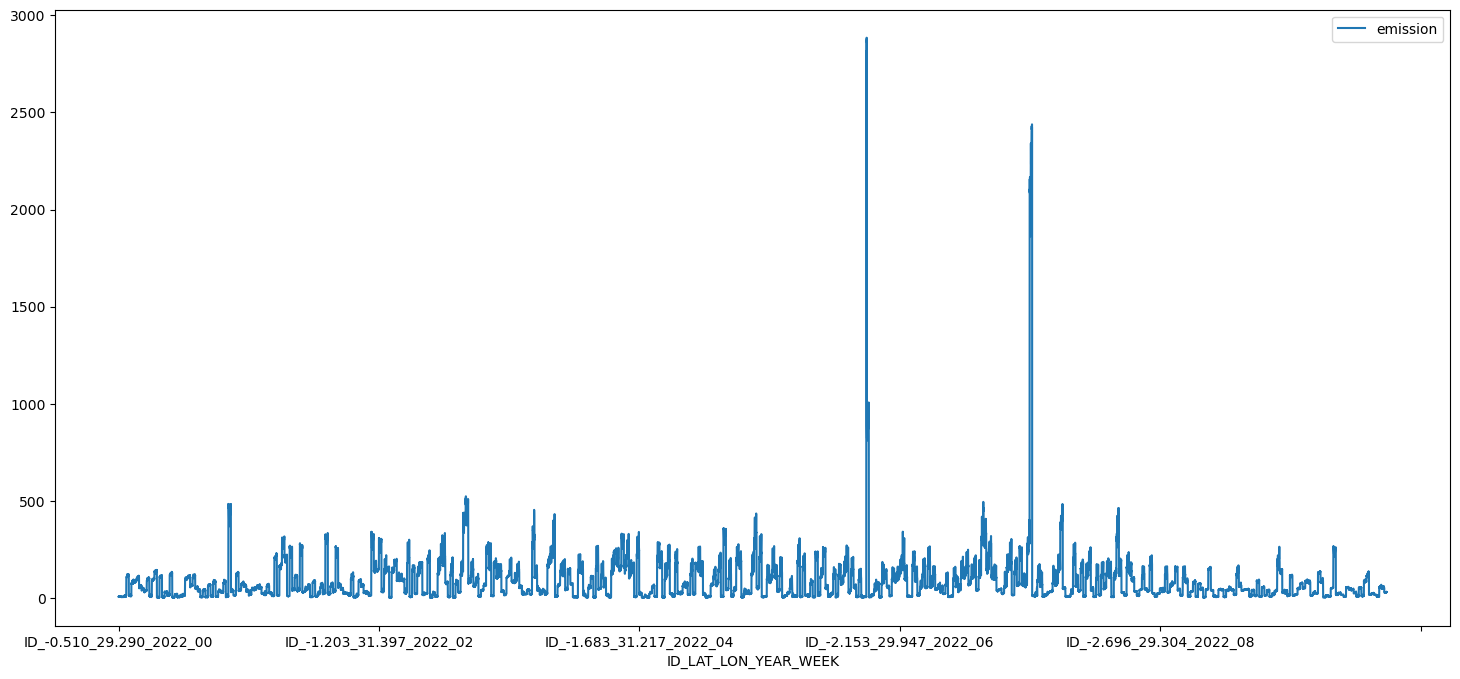

In [ ]:
Y_test_predict_df.plot()

In [ ]:
#Y_test_predict_df.to_csv('./submission.csv')